<a href="https://colab.research.google.com/github/humpyreddy96/ClusterAnalysis/blob/main/scGAMClusterAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##scGAM Cluster Analysis


This analysis aims to find the best 'k' value number of clusters for the given dataset, in this case the input is a distance matrix(481x481) between various nuclear profiles.


###**Pipeline**
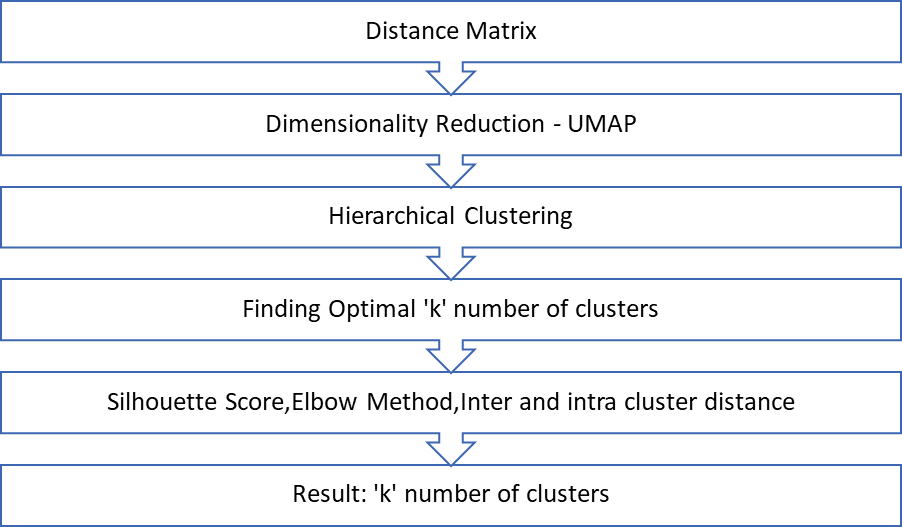

Importing Libraries

In [1]:
pip install squarify


In [2]:
pip install umap-learn


     |████████████████████████████████| 86 kB 4.8 MB/s 
     |████████████████████████████████| 1.1 MB 59.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=0c5b43fbdda731520cb2207bcdcdff6623fd51659bc28c4237ef3cad301c4a69
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=cb5c7d039a5071021bce7461bcdd76ef34bbc81b386644d333383ccb2ab051b0
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [3]:
import pandas as pd
import numpy as np
from google.colab import data_table
data_table.enable_dataframe_formatter()

import umap.umap_ as umap

import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_samples, silhouette_score


**Data Preprocessing**


Input: Distance Matrix

In [4]:
df = pd.read_csv('46Cdist.csv')
columns = df.columns.tolist()
batch_labels = []

for i in range(1,len(columns)):
  columns[i] = columns[i].split('1np_')[1].split('.')[0]
columns[0] = 'NP'
df.columns = columns
for i in range(0,481):
  batch_labels.append(int(df.columns[1:][i][1]))

df.head(3)
str = df[df.columns[0]][0].split('1np_')[1].split('.')[0]
df['NP'].values
for i in range(len(df)):
    df['NP'].values[i] = df['NP'].values[i].split('1np_')[1].split('.')[0]


In [5]:
batch_labels = []
labels = []
for i in range(0,333):
  batch_labels.append(int(df.columns[1:][i][1]+df.columns[1:][i][2]))
  labels.append(df.columns[1:][i][1]+df.columns[1:][i][2])

for i in range(333,481):
  batch_labels.append(int(df.columns[1:][i][1])) 
  labels.append(df.columns[1:][i][1])

labels = set(labels)
labels =[ 'f' + e for e in labels]


In [6]:
df = df.drop('NP', axis=1)


Dimensionality Reduction using UMAP

In [7]:
reducer = umap.UMAP(n_components=9,min_dist=0.4,n_neighbors=12,metric='precomputed')
embedding = reducer.fit_transform(df)
embedding.shape


/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(481, 9)

**Hierarchical Clustering** **& Computing Silhouette scores**

**Silhouette Score:** The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [8]:
scores_list = []
for k in range(2,10):
  z = linkage(embedding, 'average')
  cluster_labels = cut_tree(z, n_clusters=[k]).flatten()
  score = silhouette_score(embedding,cluster_labels)
  scores_list.append(score)
  colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
  print("The silhouette score for k=",k ,"is",score)


The silhouette score for k= 2 is 0.19296832
The silhouette score for k= 3 is 0.123338476
The silhouette score for k= 4 is 0.078640185
The silhouette score for k= 5 is 0.053409018
The silhouette score for k= 6 is 0.08000283
The silhouette score for k= 7 is 0.09144814
The silhouette score for k= 8 is 0.09487299
The silhouette score for k= 9 is 0.0892041


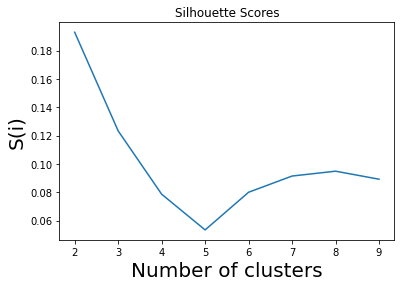

In [9]:
# Plotting a bar graph to compare the results
k=[2,3,4,5,6,7,8,9]
plt.plot(k, scores_list)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.title("Silhouette Scores")
plt.show()

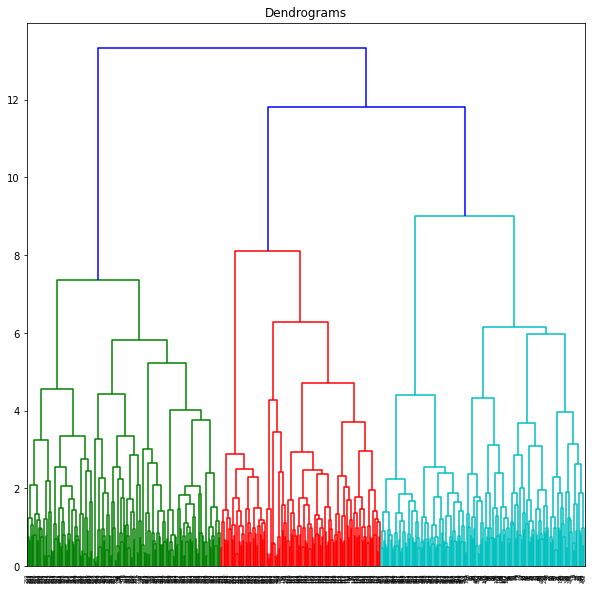

In [10]:
z = linkage(embedding, 'ward')
cluster_labels = cut_tree(z, n_clusters=[2]).flatten()
plt.figure(figsize=(10,10 ))  
plt.title("Dendrograms")  
dend = shc.dendrogram(z)

In [11]:
cluster_labels_8 = cut_tree(z, n_clusters=[8]).flatten()


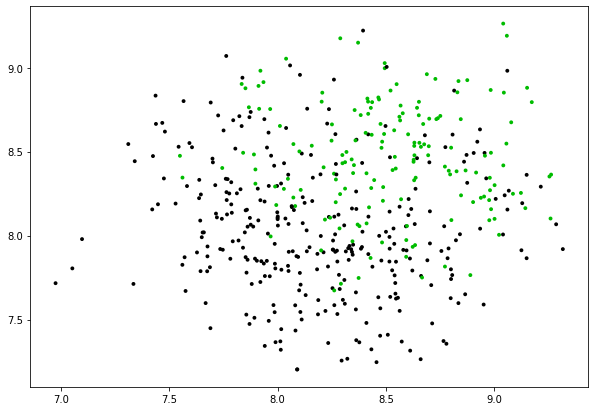

In [12]:
colors = cm.nipy_spectral(cluster_labels.astype(float) / 2)
plt.figure(figsize=[10,7])
plt.scatter(embedding[:, 0], embedding[:, 1], marker=".", s=60, lw=0, c=colors)

In [13]:
def get_batch_effect(batch_number):
  count_1 = 0
  count_0 = 0
  for i in range(481):
      if batch_labels[i]==batch_number:
        if cluster_labels[i]==0:
          count_0 = count_0 + 1
        else:
          count_1 = count_1 + 1
  return (count_0,count_1)

In [68]:
cluster_0= []
cluster_1= []
batches = set(batch_labels)
for i in batches:
  cluster_0.append(get_batch_effect(i)[0])
  cluster_1.append(get_batch_effect(i)[1])

['f12',
 'f13',
 'f14',
 'f11',
 'f8',
 'f10',
 'f17',
 'f16',
 'f18',
 'f7',
 'f9',
 'f3',
 'f15',
 'f5',
 'f6']

## Batch Effect
Visualization of which batches appear in cluster 1 and in cluster 2

Text(0.5, 1.0, 'Cluster 2')

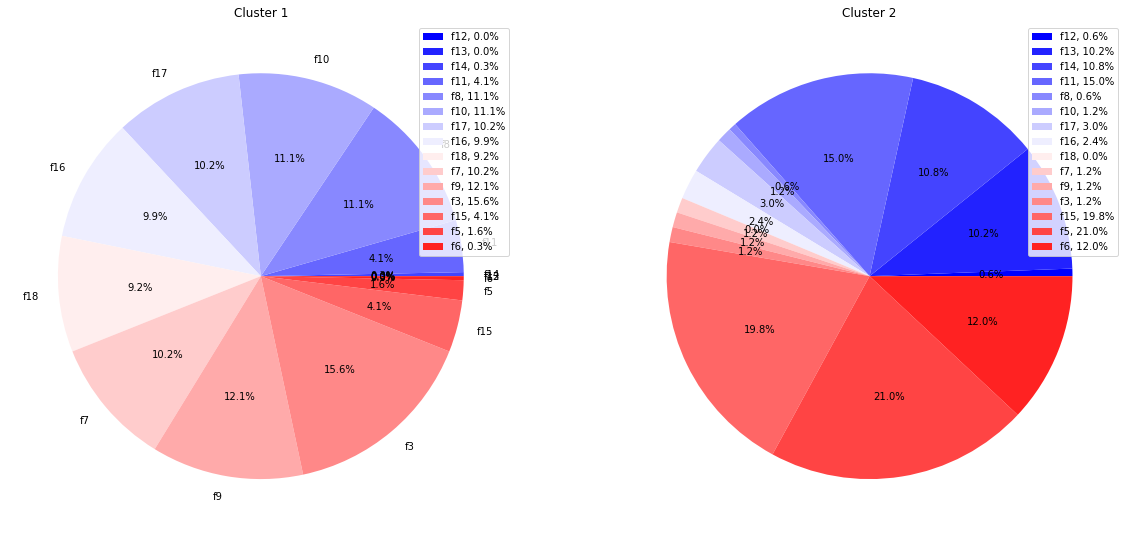

In [16]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20),sharey=True)
theme = plt.get_cmap('bwr')
#Cluster 1
ax1.set_prop_cycle("color",[theme(1. * i / len(cluster_0)) for i in range(len(cluster_0))])
ax1.pie(cluster_0, autopct='%1.1f%%',labels=labels)
ax1.legend( loc='upper right' ,  labels=['%s, %1.1f%%' % (l, (float(s) / sum(cluster_0)) * 100) for l, s in zip(labels, cluster_0)])
ax1.set_title('Cluster 1')

# labels_1 = ['f5','f7','f8','f9','f11','f14','f16','f18']
theme = plt.get_cmap('bwr')
ax2.set_prop_cycle("color",[theme(1. * i / len(cluster_1)) for i in range(len(cluster_1))])
ax2.pie(cluster_1, autopct='%1.1f%%')
ax2.legend( loc='upper right',  labels=['%s, %1.1f%%' % (l, (float(s) / sum(cluster_1)) * 100) for l, s in zip(labels, cluster_1)],)
ax2.set_title('Cluster 2')


#cluster_0
#labels

##Agglomerative Clustering

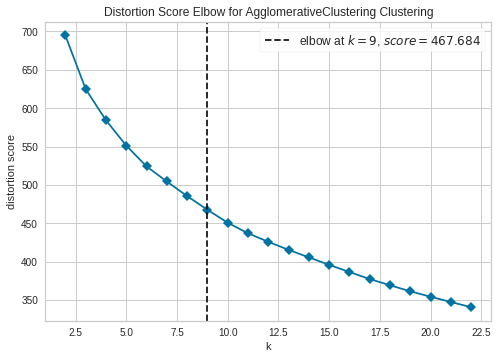

In [126]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,23), timings=False)
# Fit data to visualizer
visualizer.fit(embedding)
# Finalize and render figure
visualizer.show()

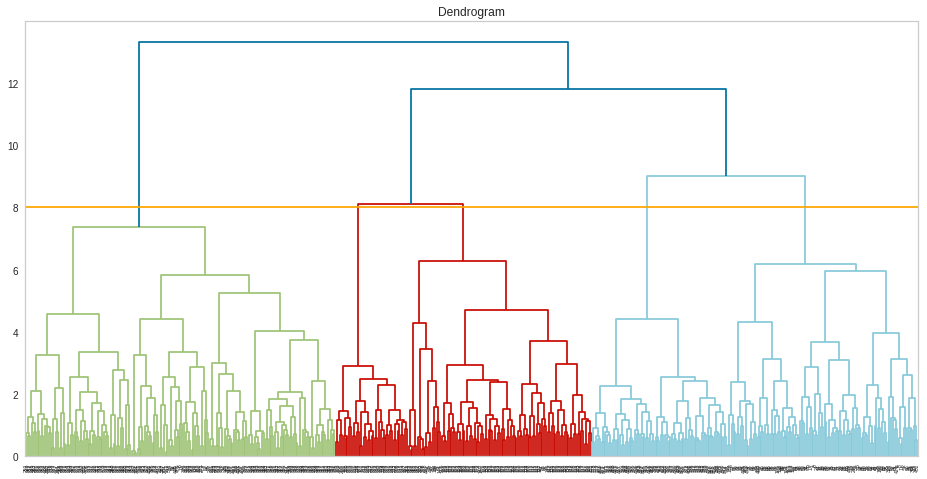

In [20]:
import scipy.cluster.hierarchy as sch

# size of image
plt.figure(1, figsize = (16 ,8))  
plt.grid(b=None)

# creating the dendrogram 
dend = sch.dendrogram(sch.linkage(embedding, method='ward'))

# theroshold
plt.axhline(y=8, color='orange')

# ploting graphabs
plt.title('Dendrogram')
plt.show()

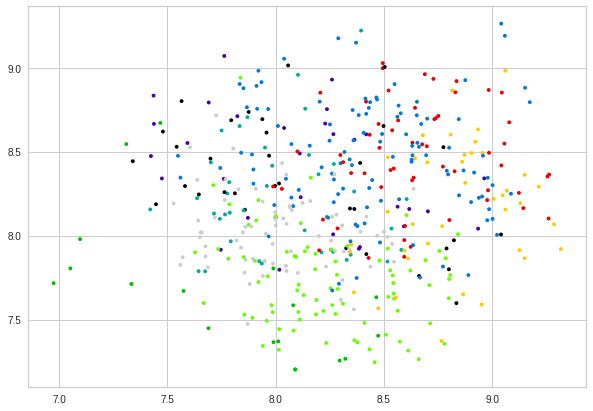

In [23]:
cluster_labels_8 = cut_tree(z, n_clusters=[9]).flatten()
colors = cm.nipy_spectral(cluster_labels_8.astype(float) / 8)
plt.figure(figsize=[10,7])
plt.scatter(embedding[:, 0], embedding[:, 1], marker=".", s=60, lw=0, c=colors)

In [66]:
def get_batch_effect(batch_number):
  count_1 = 0
  count_0 = 0
  count_2 = 0
  count_3 = 0
  count_4 = 0
  count_5 = 0
  count_6 = 0
  count_7 = 0
  count_8 = 0
  for i in range(481):
      if batch_labels[i]==batch_number:
        if cluster_labels_8[i]==0:
          count_0 = count_0 + 1
        elif cluster_labels_8[i]==1:
          count_1 = count_1 + 1
        elif cluster_labels_8[i]==2:
          count_2 = count_2 + 1
        elif cluster_labels_8[i]==3:
          count_3 = count_3 + 1
        elif cluster_labels_8[i]==4:
          count_4 = count_4 + 1
        elif cluster_labels_8[i]==5:
          count_5 = count_5 + 1
        elif cluster_labels_8[i]==6:
          count_6 = count_6 + 1       
        elif cluster_labels_8[i]==7:
          count_7 = count_7 + 1    
        elif cluster_labels_8[i]==8:
          count_8 = count_8 + 1
          
  return (count_0,count_1,count_2,count_3,count_4,count_5,count_6,count_7,count_8)

In [67]:
cluster_0= []
cluster_1= []
cluster_2=[]
cluster_3=[]
cluster_4=[]
cluster_5=[]
cluster_6=[]
cluster_7=[]
cluster_8=[]



batches = set(batch_labels)
for i in batches:
  cluster_0.append(get_batch_effect(i)[0])
  cluster_1.append(get_batch_effect(i)[1])
  cluster_2.append(get_batch_effect(i)[2])
  cluster_3.append(get_batch_effect(i)[3])
  cluster_4.append(get_batch_effect(i)[4])
  cluster_5.append(get_batch_effect(i)[5])
  cluster_6.append(get_batch_effect(i)[6])
  cluster_7.append(get_batch_effect(i)[7])
  cluster_8.append(get_batch_effect(i)[8])


In [94]:
cluster_2

[1, 17, 18, 25, 1, 2, 5, 4, 0, 2, 2, 2, 7, 15, 9]

Text(0.5, 1.0, 'Cluster 9')

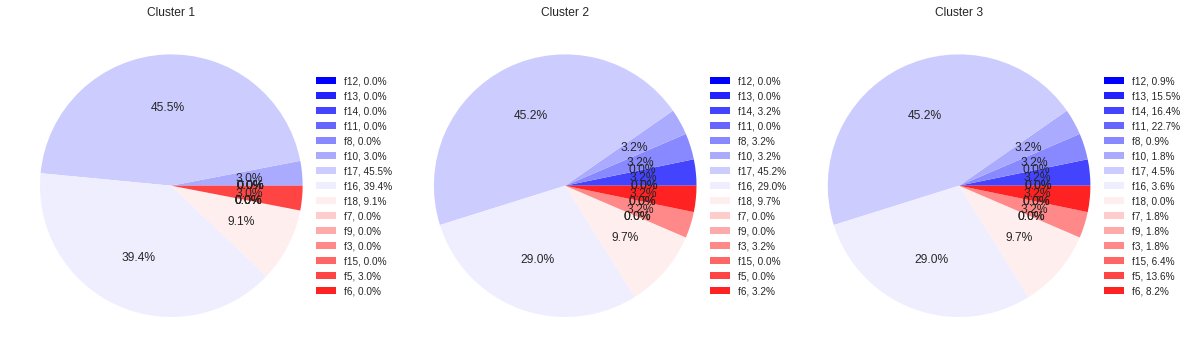

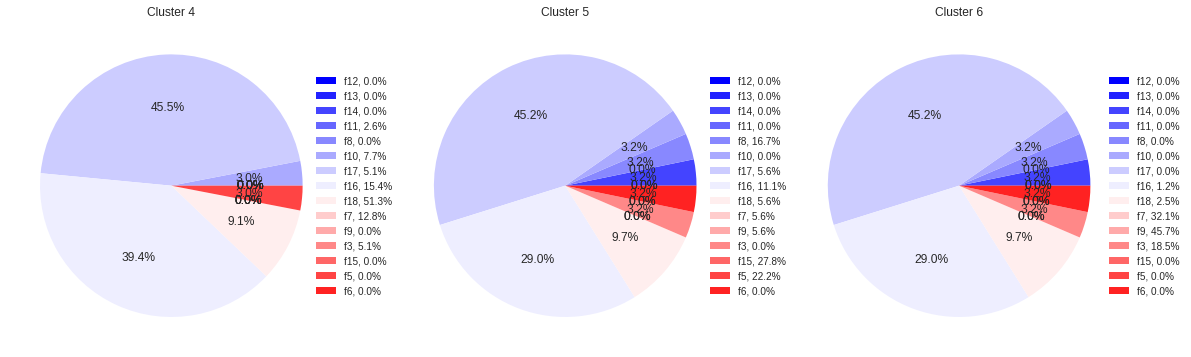

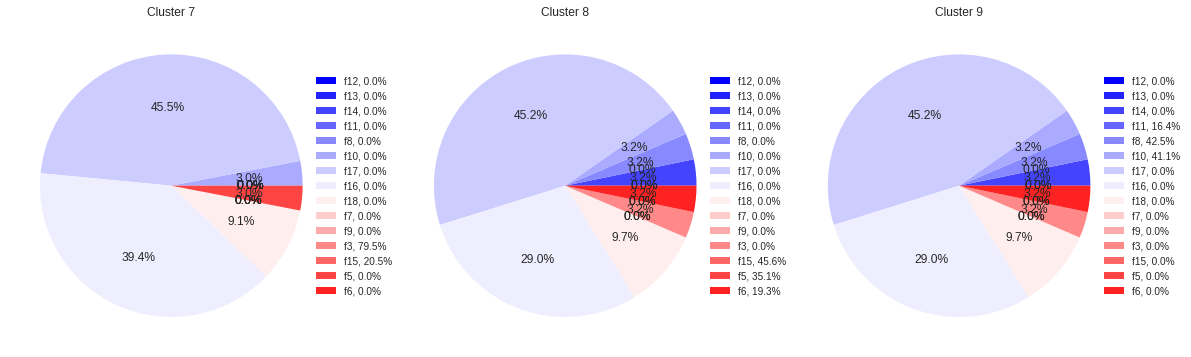

In [115]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20,20),sharey=True)
theme = plt.get_cmap('bwr')
#Cluster 1
ax1.set_prop_cycle("color",[theme(1. * i / len(cluster_0)) for i in range(len(cluster_0))])
ax1.pie(cluster_0, autopct='%1.1f%%')
ax1.legend(bbox_to_anchor=(1.2,0.5), loc="right" ,  labels=['%s, %1.1f%%' % (l, (float(s) / sum(cluster_0)) * 100) for l, s in zip(labels, cluster_0)])
ax1.set_title('Cluster 1')

#Cluster 2 
theme = plt.get_cmap('bwr')
ax2.set_prop_cycle("color",[theme(1. * i / len(cluster_1)) for i in range(len(cluster_1))])
ax2.pie(cluster_1, autopct='%1.1f%%')
ax2.legend(bbox_to_anchor=(1.2,0.5), loc="right",  labels=['%s, %1.1f%%' % (l, (float(s) / sum(cluster_1)) * 100) for l, s in zip(labels, cluster_1)],)
ax2.set_title('Cluster 2')

#Cluster 3
theme = plt.get_cmap('bwr')
ax3.set_prop_cycle("color",[theme(1. * i / len(cluster_2)) for i in range(len(cluster_2))])
ax3.pie(cluster_1, autopct='%1.1f%%')
ax3.legend(bbox_to_anchor=(1.2,0.5), loc="right",labels=['%s, %1.1f%%' % (l, (float(s) / sum(cluster_2)) * 100) for l, s in zip(labels, cluster_2)],)
ax3.set_title('Cluster 3')

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20,20),sharey=True)
theme = plt.get_cmap('bwr')
#Cluster 4
ax1.set_prop_cycle("color",[theme(1. * i / len(cluster_3)) for i in range(len(cluster_3))])
ax1.pie(cluster_0, autopct='%1.1f%%')
ax1.legend(bbox_to_anchor=(1.2,0.5), loc="right" ,  labels=['%s, %1.1f%%' % (l, (float(s) / sum(cluster_3)) * 100) for l, s in zip(labels, cluster_3)])
ax1.set_title('Cluster 4')

#Cluster 5 
theme = plt.get_cmap('bwr')
ax2.set_prop_cycle("color",[theme(1. * i / len(cluster_4)) for i in range(len(cluster_4))])
ax2.pie(cluster_1, autopct='%1.1f%%')
ax2.legend(bbox_to_anchor=(1.2,0.5), loc="right",  labels=['%s, %1.1f%%' % (l, (float(s) / sum(cluster_4)) * 100) for l, s in zip(labels, cluster_4)],)
ax2.set_title('Cluster 5')

#Cluster 6
theme = plt.get_cmap('bwr')
ax3.set_prop_cycle("color",[theme(1. * i / len(cluster_5)) for i in range(len(cluster_5))])
ax3.pie(cluster_1, autopct='%1.1f%%')
ax3.legend(bbox_to_anchor=(1.2,0.5), loc="right",labels=['%s, %1.1f%%' % (l, (float(s) / sum(cluster_5)) * 100) for l, s in zip(labels, cluster_5)],)
ax3.set_title('Cluster 6')

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20,20),sharey=True)

#Cluster 7
ax1.set_prop_cycle("color",[theme(1. * i / len(cluster_6)) for i in range(len(cluster_6))])
ax1.pie(cluster_0, autopct='%1.1f%%')
ax1.legend(bbox_to_anchor=(1.2,0.5), loc="right" ,  labels=['%s, %1.1f%%' % (l, (float(s) / sum(cluster_6)) * 100) for l, s in zip(labels, cluster_6)])
ax1.set_title('Cluster 7')

#Cluster 8
theme = plt.get_cmap('bwr')
ax2.set_prop_cycle("color",[theme(1. * i / len(cluster_7)) for i in range(len(cluster_7))])
ax2.pie(cluster_1, autopct='%1.1f%%')
ax2.legend(bbox_to_anchor=(1.2,0.5), loc="right",  labels=['%s, %1.1f%%' % (l, (float(s) / sum(cluster_7)) * 100) for l, s in zip(labels, cluster_7)],)
ax2.set_title('Cluster 8')

#Cluster 9
theme = plt.get_cmap('bwr')
ax3.set_prop_cycle("color",[theme(1. * i / len(cluster_8)) for i in range(len(cluster_8))])
ax3.pie(cluster_1, autopct='%1.1f%%')
ax3.legend(bbox_to_anchor=(1.2,0.5), loc="right",labels=['%s, %1.1f%%' % (l, (float(s) / sum(cluster_8)) * 100) for l, s in zip(labels, cluster_8)],)
ax3.set_title('Cluster 9')